<a href="https://colab.research.google.com/github/ahathaway821/COVID-19-Fact-Checking/blob/master/src/exploratory-analysis/COVID_Dataset_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# EDA on COVID-19 Poynter Dataset

In [0]:
# Load csv
import pandas as pd
import os
import re
from wordcloud import WordCloud
import numpy as np
from sklearn.cluster import MiniBatchKMeans
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

In [3]:
!git clone https://github.com/ahathaway821/COVID-19-Fact-Checking.git

Cloning into 'COVID-19-Fact-Checking'...
remote: Enumerating objects: 18, done.
remote: Counting objects: 100% (18/18), done.
remote: Compressing objects: 100% (15/15), done.
remote: Total 18 (delta 2), reused 4 (delta 0), pack-reused 0
Unpacking objects: 100% (18/18), done.


In [7]:
data = pd.read_csv('/content/COVID-19-Fact-Checking/data/poynterDataScraped27May2020.csv')
data.head()

,When did you see the claim?,Country 1,Country 2,Country 3,Country 4,Countries,Organization,What did you fact-check?,Who said/posted it?,URL to fact-checked article (in your language),Final rating,Explanation
0,2020/05/25,Brazil,NaN,NaN,NaN,Brazil,Agência Lupa,"Brazilian states receive a R$ 16,450 extra fu...",Facebook,https://piaui.folha.uol.com.br/lupa/2020/05/25...,FALSE,"According to the Ministry of Health, this ext..."
1,2020/05/25,India,NaN,NaN,NaN,India,FactCrescendo,COVID-19 is a bacteria causing death due to t...,Facebook/WhatsApp,https://english.factcrescendo.com/2020/05/26/f...,FALSE,COVID-19 is a virus and the theory is baseles...
2,2020/05/25,Brazil,NaN,NaN,NaN,Brazil,Agência Lupa,A video shows a group of police officers salu...,Facebook,https://piaui.folha.uol.com.br/lupa/2020/05/25...,FALSE,"The video is real, but they were not saluting..."
3,2020/05/25,India,NaN,NaN,NaN,India,FactCrescendo,Video shows a doctor claiming that If you can...,Facebook/Twitter,https://marathi.factcrescendo.com/no-holding-y...,FALSE,""" Medical Experts have clarified that being ab..."
4,2020/05/25,Spain,United States,NaN,NaN,"Spain, United States",Maldita.es,A poem signed by K. O’Meara beginning with th...,Social media,https://maldita.es/malditobulo/2020/05/25/poem...,FALSE,"It is a hoax. The title of the poem is ""In th..."


In [23]:
data.describe()

,When did you see the claim?,Country 1,Country 2,Country 3,Country 4,Countries,Organization,What did you fact-check?,Who said/posted it?,URL to fact-checked article (in your language),Final rating,Explanation
count,6577,6577,556,116,30,6577,6577,6577,6577,6576,6577,6577
unique,129,101,91,49,24,353,91,5906,1021,5977,50,5831
top,2020/03/23,India,North Africa,Kyrgyzstan,Ecuador,India,AFP,A video viewed thousands of times on Facebook...,Facebook,http://www.ecuadorchequea.com/las-mentiras-sob...,False,Please click the link to read the full article
freq,144,1270,135,10,3,1262,662,5,2020,24,3001,96


### Where was it posted

In [48]:
data['Who said/posted it?'].unique()

array([' Facebook', ' Facebook/WhatsApp', ' Facebook/Twitter', ...,
       ' retenews24.it',
       ' Sputnik, and then other media outlets in the Balkan regio',
       ' Emma Parker, writer at the Daily Star (and many others)'],
      dtype=object)

In [49]:
pd.value_counts(data['Who said/posted it?'])

 Facebook                                            2020
 WhatsApp                                             418
 Twitter                                              336
 Facebook, Twitter                                    222
 Many social media platforms                          215
                                                     ... 
 YouTube channel Balitang Duterte Tv                    1
 The Kenyan Voice                                       1
 WhatsApp, Twitter, Facebook, Instagram, websites       1
 Jerome Adams                                           1
 Video posted on Facebook and Youtube                   1
Name: Who said/posted it?, Length: 1021, dtype: int64

In [0]:
# We need to separate out the commas. Facebook, Twitter should add that count to Facebook as well as Twitter. FB, Facebook posts all point to Facebook as well

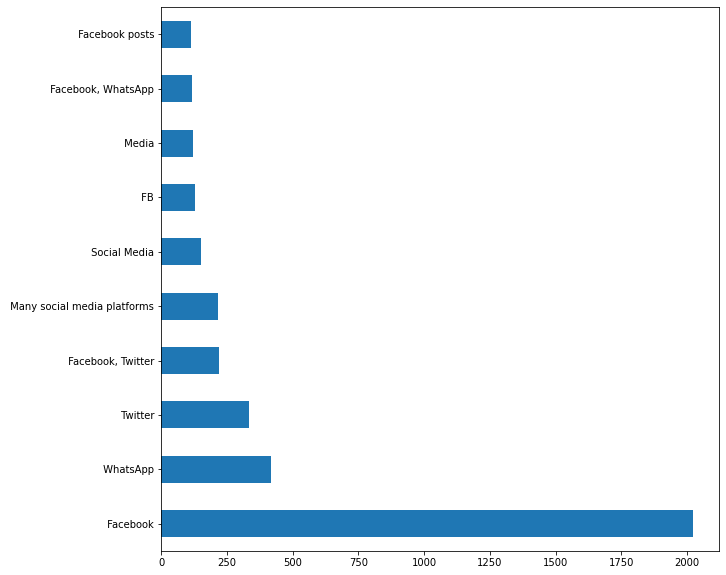

In [52]:
pd.value_counts(data['Who said/posted it?']).head(10).plot.barh(figsize=(10,10))

### Distribution of the ratings

In [28]:
data['Final rating'].unique()

array(['FALSE', 'PARTLY FALSE', 'MISLEADING', 'Partly False',
       'misleading', 'No evidence', 'False', 'Misleading', 'Partly false',
       'Mostly False', 'MOSTLY FALSE', 'mislEADING', 'partly false',
       'No Evidence', 'Mostly false', 'NO EVIDENCE', 'o evidence',
       'mostly false', 'Explanatory', 'Two Pinocchios', 'Fake',
       'half true', 'Half True', 'Mostly True', 'Suspicions',
       'PARTLY TRUE', 'True bu', 'Partly true', 'MOSTLY TRUE',
       'Partially correc', 'Misleading/False', 'Unprove',
       'Partially false', '"\\n(Org. doesn\'t apply rating)"',
       'IN DISPUTE', 'Mostly true', 'false and misleading', 'Mixed',
       'HALF TRUE', 'HALF TRUTH', 'Partially true', 'MiSLEADING',
       'Correc', 'false', 'Unlikely', 'PANTS ON FIRE',
       'Misinformation / Conspiracy theory', 'Fake news', 'Unverified',
       'Not true'], dtype=object)

In [0]:
'''
We see that MISLEADING has been spelt in various ways and is being counted separately

Fix the following
    - False, FALSE
    - Misleading, MISLEADING, misleading
    - Mostly false, Mostly False, MOSTLY FALSE
    - Partly false, PARTLY FALSE, Partly False
    - No evidence, No Evidence, o evidence
    - Explanatory
    - MOSTLY TRUE, 
    - "\n(Org. doesn't apply rating)"
    - HALF TRUE
    etc
'''

In [29]:
pd.value_counts(data['Final rating'])

False                                 3001
FALSE                                 2552
Misleading                             396
MISLEADING                             145
Mostly false                            98
Partly false                            90
misleading                              56
No evidence                             41
Explanatory                             40
Mostly False                            24
PARTLY FALSE                            17
No Evidence                             15
Partly False                            10
o evidence                               8
MOSTLY TRUE                              7
"\n(Org. doesn't apply rating)"          7
HALF TRUE                                6
MOSTLY FALSE                             6
Partially false                          5
Fake                                     4
Mostly True                              4
mostly false                             4
Two Pinocchios                           3
partly fals

In [0]:
# Convert all ratings to lowercase
data['Final rating'] = data['Final rating'].str.lower()

In [0]:
data['Final rating'] = data['Final rating'].replace({'o evidence':'no evidence'})

In [46]:
pd.value_counts(data['Final rating'])

false                                 5554
misleading                             599
mostly false                           132
partly false                           120
no evidence                             65
explanatory                             40
mostly true                             12
half true                               11
"\n(org. doesn't apply rating)"          7
partially false                          5
fake                                     4
two pinocchios                           3
partly true                              3
misleading/false                         2
suspicions                               2
not true                                 2
correc                                   2
unprove                                  2
partially correc                         1
unverified                               1
false and misleading                     1
in dispute                               1
mixed                                    1
pants on fi

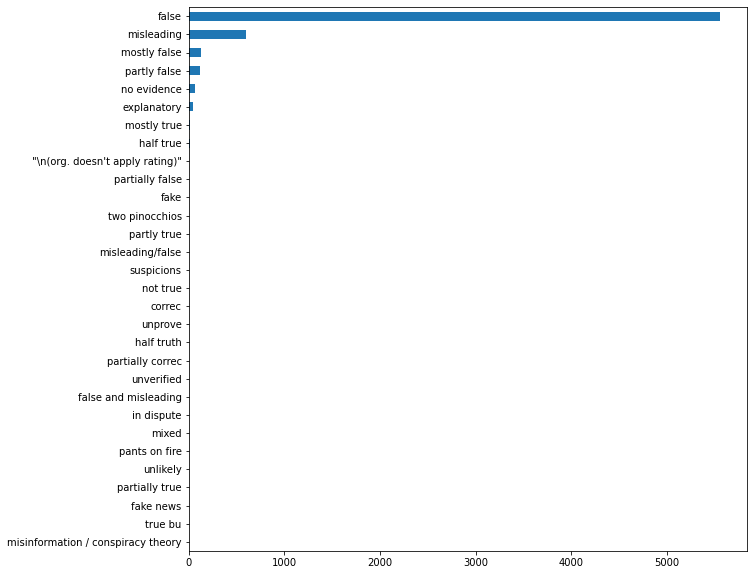

In [47]:
pd.value_counts(data['Final rating']).sort_values().plot.barh(figsize=(10,10))

### When was the claim posted

In [55]:
pd.value_counts(data['When did you see the claim?'])

2020/03/23     144
2020/03/17     141
2020/03/19     137
2020/04/02     134
2020/03/24     125
              ... 
2020/01/23       3
2020/01/21       2
2020/01/18       1
2020/01/14       1
2020/01/19       1
Name: When did you see the claim?, Length: 129, dtype: int64

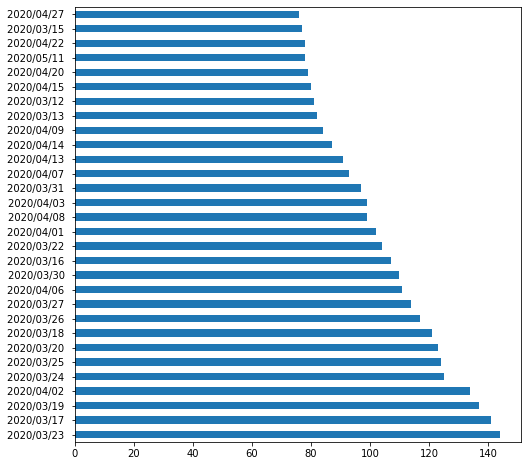

In [69]:
pd.value_counts(data['When did you see the claim?']).head(30).plot.barh(figsize=(8,8))

### Create clusters


In [0]:
# Using : https://sanjayasubedi.com.np/nlp/nlp-with-python-document-clustering/

In [13]:
# for reproducibility
random_state = 0 

df = pd.read_csv('/content/COVID-19-Fact-Checking/data/poynterDataScraped27May2020.csv',
                 usecols=["What did you fact-check?", "Final rating"])
df.columns = ['text', 'label']
df.head()

,text,label
0,"Brazilian states receive a R$ 16,450 extra fu...",FALSE
1,COVID-19 is a bacteria causing death due to t...,FALSE
2,A video shows a group of police officers salu...,FALSE
3,Video shows a doctor claiming that If you can...,FALSE
4,A poem signed by K. O’Meara beginning with th...,FALSE


In [0]:
vec = TfidfVectorizer(stop_words="english")
vec.fit(df.text.values)
features = vec.transform(df.text.values)

In [16]:
cls = MiniBatchKMeans(n_clusters=27, random_state=random_state)
cls.fit(features)

MiniBatchKMeans(batch_size=100, compute_labels=True, init='k-means++',
                init_size=None, max_iter=100, max_no_improvement=10,
                n_clusters=27, n_init=3, random_state=0,
                reassignment_ratio=0.01, tol=0.0, verbose=0)

In [17]:
# predict cluster labels for new dataset
cls.predict(features)

# to get cluster labels for the dataset used while
# training the model (used for models that does not
# support prediction on new dataset).
cls.labels_

array([24, 24,  4, ..., 18,  2, 18], dtype=int32)

In [0]:
# reduce the features to 2D
pca = PCA(n_components=2, random_state=random_state)
reduced_features = pca.fit_transform(features.toarray())

# reduce the cluster centers to 2D
reduced_cluster_centers = pca.transform(cls.cluster_centers_)

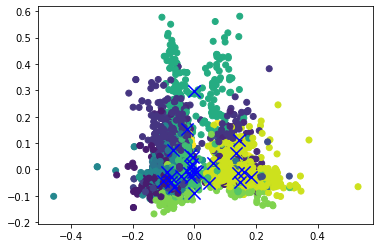

In [21]:
plt.scatter(reduced_features[:,0], reduced_features[:,1], c=cls.predict(features))
plt.scatter(reduced_cluster_centers[:, 0], reduced_cluster_centers[:,1], marker='x', s=150, c='b')